In [12]:
from soil.agents import FSM, state, default_state
from soil import Environment
from random import random, shuffle, sample
from itertools import islice
import logging
from enum import Enum
from random import randint
from soil import simulation
from soil import *
import soil
import networkx as nx
import matplotlib.pyplot as plt
import logging
import random
import numpy
logging.basicConfig()


In [13]:
class Genders(Enum):
    male = 'male'
    female = 'female'

class Venues(Enum):
    pub = 'pub'
    disco = 'disco'
    street = 'street'


class CityPubs(Environment):

    """
    The environment is key in a simulation. It contains the network topology,
    a reference to network and environment agents, as well as the environment
    params, which are used as shared state between agents.
    The environment parameters and the state of every agent can be accessed
    both by using the environment as a dictionary or with the environment's 
    :meth:`soil.environment.Environment.get` method.
    'name': 'The awesome pub #{}'.format(i),
                'open': True,
                'capacity': pub_capacity ,
                'occupancy': 0,
                'price':randint(4, 6),
                'type': Venues.pub.value,
    """

  
    level = logging.INFO

   


    def __init__(self, *args, number_of_pubs=3, number_of_discos=3, number_of_street=3, **kwargs):
                   
                    super(CityPubs, self).__init__(*args, **kwargs)  #Para la clase superior. Constructor super.
                    pubs = {}
                    for i in range(number_of_pubs):
                        newpub = {
                            'name': 'The awesome pub #{}'.format(i),
                            'open': False,
                            'capacity': numpy.random.normal(100,50),
                            'occupancy': 0,
                            'price':randint(5, 8),
                            'type': Venues.pub.value,
                            'entry': 0,
                            'opening_time': 1,
                            'closing_time': randint(19,23),
                        }
                        pubs[newpub['name']] = newpub
                    for i in range(number_of_discos):
                        newpub = {
                            'name': 'The awesome disco #{}'.format(i),
                            'open': False,
                            'capacity': numpy.random.normal(1300,1000) ,
                            'occupancy': 0,
                            'price':randint(7, 12),
                            'type': Venues.disco.value,
                            'entry': randint(15,20),
                            'opening_time': 9,
                            'closing_time': randint(31,35),
                        }
                        pubs[newpub['name']] = newpub
                    for i in range(number_of_street):
                        newpub = {
                            'name': 'The awesome street #{}'.format(i),
                            'open': False,
                            'capacity': 10000 ,
                            'occupancy': 0,
                            'price':randint(2,5),
                            'type': Venues.street.value,
                            'entry': 0,
                            'opening_time': 1,
                            'closing_time': 38,
                        }
                        pubs[newpub['name']] = newpub
            
                        
                    self['pubs'] = pubs




    def return_open (self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['open']


    def return_occupancy (self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['occupancy']

    def return_price(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['price']

    def return_name(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['name']

    def return_type(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['type']

    def return_opening_time(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['opening_time']

    def return_closing_time(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['closing_time']


    def set_open(self,pub_name):
        pub = self['pubs'][pub_name]
        pub['open'] = True

    def set_close(self,pub_name):
        pub = self['pubs'][pub_name]
        pub['open'] = False

    def set_capacity(self,pub_name, number):
        pub = self['pubs'][pub_name]
        pub['capacity'] = number

        

    def enter(self, pub_name, *nodes):

        '''Agents will try to enter. The pub checks if it is possible'''
        #A este método se le pasa el id del pub al que quieren entrar, y el grupo de amigos.
        #Hace comprobaciones con la capacidad y viendo si está abierto. Devuelve True si se puede entrar.

        try:
            pub = self['pubs'][pub_name]
        except KeyError:
            raise ValueError('Pub {} is not available'.format(pub_name))

        for node in nodes:
            if not pub['open'] or (pub['capacity'] < (len(nodes) + pub['occupancy'])) or node['money']< pub['entry']:

                return False

        pub['occupancy'] += len(nodes)
        for node in nodes:
            node['pub'] = pub_name
            node['money'] = node['money'] - pub['entry']
        return True


    #Devuelve una lista de pubs en los que se puede entrar. Lo hace con yield: se genera un objeto en vez de 
    # una lista. Cuando se llama al método no se genera la lista, se genera un objeto. SOlo cuando intentemos recorrerlo
    # se generará una lista que además solo puede recorrerse una vez --> https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do
    """def available_pubs(self):
                    
                    for pub in self['pubs'].values():
                        if pub['open'] and (pub['occupancy'] < pub['capacity']):
                            yield pub['name']"""

    def available_pubs_total(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']):
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_pubs(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "pub":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_discos(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "disco":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_street(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "street":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def get_venues(self):

        venues = []
        for venue in self['pubs'].values():
            venues.append(venue['name'])
        return venues 

    #Un grupo se va de un pub. La sintaxis "del" es como decir que te vacíe esa variable
    """def exit(self, pub_id, *node_ids):
                    '''Agents will notify the pub they want to leave'''
                    try:
                        pub = self['pubs'][pub_id]
                    except KeyError:
                        raise ValueError('Pub {} is not available'.format(pub_id))
                    for node_id in node_ids:
                        node = self.get_agent(node_id)
                        if pub_id == node['pub']:
                            del node['pub']
                            pub['occupancy'] -= 1
            
                def exit(self, pub_id, *nodes):
                    '''Agents will notify the pub they want to leave'''
                    try:
                        pub = self['pubs'][pub_id]
                    except KeyError:
                        raise ValueError('Pub {} is not available'.format(pub_id))
                    for node in nodes:
                     
                        if pub_id == node['pub']:
                            del node['pub']
                            pub['occupancy'] -= 1
            """
    def exit(self, pub_name, *nodes):

        try:
            pub = self['pubs'][pub_name]
        except KeyError:
            raise ValueError('Pub {} is not available'.format(pub_name))
        
        pub['occupancy'] -= len(nodes)
        
        


In [21]:
class Patron(FSM):
    '''Agent that looks for friends to drink with. It will do three things:
        1) Look for other patrons to drink with
        2) Look for a bar where the agent and other agents in the same group can get in.
        3) While in the bar, patrons only drink, until they get drunk and taken home.
    '''

    """Aquí va un init donde se hace todo"""
    level = logging.INFO

    defaults = {
        'pub': None,
        'drunk': False,
        'pints': 0,
        'max_pints': 5,
        'in_a_group':False,
        #'gender': Genders.male.value,
        'money':20,
        'is_leader': False,
        'group_size':0,
        'num_of_changes':0,
        #'age': 15,
        'altercation_drinkthreshold': 12,
        'intoxicated': False,
        'going_out_time':10,
        'coming_back_time':16
        ##'interval'
    }

    """def __init__(self, *args, number_of_pubs=3, number_of_discos=3, number_of_street=3, **kwargs):
            r=random()
                             if age==15:
                                 if r<0.163:
                                     self['coming_back_time'] = randint()
                             elif age==20:
                     
                             else:
    """
                                  



    @default_state
    @state
    def looking_for_friends(self):
        '''Look for friends to drink with'''
        #Dependiendo de la edad podemos hacerles algunas asignaciones de parámetros de esta manera, ya que en el otro
        #lado no se le puede meter código
        if self['age'] == 15:
            self['money'] = randint(17,23) #EN un futuro aquí se pone self['money'] = numpy.random.normal(20) o algo así imaginemos
        elif self['age'] == 20:
            self['money'] = randint(22,27)
        else:
            self['money']=randint(32,40)

        if(self['in_a_group'] == False):
            self.info('I am looking for friends')
            self['is_leader'] = True
            self['num_of_changes'] = int(numpy.random.normal(5.9,2))
            available_friends = list(self.get_agents(drunk=False,
                                                     pub=None,
                                                     in_a_group=False,
                                                     age=self['age']))
                                                     
            if not available_friends or len(available_friends)==1:
                self.info('Life sucks and I\'m alone!')
                return self.at_home
            befriended = self.try_friends(available_friends)
            if befriended:
                #Se les da una hora de salir a todos la misma, quizás hacer en una función
                return self.looking_for_pub#, self.env.timeout(3)--mismo comentario de going_out_time
        else:
            self.info('{} has a group already' .format(self.id))
            return self.looking_for_pub #No pasar al siguiente hasta que pasen going_out_time pasos

    @state
    def looking_for_pub(self):
        '''Look for a pub that accepts me and my friends'''
        if self['pub'] != None:
            return self.sober_in_pub
        self.debug('I am looking for a pub')
        group = list(self.get_neighboring_agents())

        r = random()


        # ESTO DEPENDE DE LOS ITINERARIOS
        # TENDRÁ QUE EMPEZAR CADA UNO EN UN SITIO DEPENDIENDO DE LA EDAD Y LUEGO SIGUEN INTINERARIOS FIJOS
        # CON UNA CIERTA PROBABILIDAD

        #Preguntar como se ponen estas probabilidades en base a los estudios

        if(self['age'] == 15):

            if (0.4>r):
                available_pubs = self.env.available_pubs()
                

            elif (0.75>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()

        elif(self['age'] == 20):

            if (0.5>r):
                available_pubs = self.env.available_pubs()
                



            elif (0.8>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()

        else:

            if (0.6>r):
                available_pubs = self.env.available_pubs()
                

            elif (0.9>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()



        for pub in available_pubs:
            
           
            self.debug('We\'re trying to get into {}: total: {}'.format(pub, len(group)))
            if self.env.enter(pub, self, *group):
                self.info('We\'re all {} getting in {}!'.format(len(group)+1, pub))
                capacity = self.env.return_occupancy(pub)
                self.info('{} now has {} people inside'.format(pub,capacity))
                return self.sober_in_pub
            else:
                self.info("We can\'t go inside {}".format(pub))

    @state
    def sober_in_pub(self):
      

        type = self.env.return_type(self['pub'])




        # ESTO DEPENDE DE LOS ITINERARIOS, QUITAR NUM_OF_CHANGES?
      
        if(type=="disco"):
            self['prob_change_bar'] = 0.01


        else:
            #Street o pub 
            self['prob_change_bar'] = 0.2


        if (self['is_leader'] and self['prob_change_bar']>random()) or (self['is_leader'] and not self.env.return_open(self['pub'])):
            self.change_bar()
            self['num_of_changes'] = self['num_of_changes']  + 1



        '''Drink up.'''
        self.drink()

        if self['pints'] > self['max_pints']:
            self['drunk'] = True
            self.info('I\'m so drunk.')
            return self.drunk_in_pub

    @state
    def drunk_in_pub(self):
        
        #Cuando están borrachos, NO se van a casa, pero pueden tener altercados. Coma etilico (o intoxicacion), pelea o violencia verbal
        #, vandalismo
        #Tanbien puede cambiar de bar. Comprobar lo mismo que en sober pero
        #cambiando parámetros
        if (self['is_leader'] and self['prob_change_bar']>random()) or (self['is_leader'] and not self.env.return_open(self['pub'])):
            self.change_bar()
            self['num_of_changes'] = self['num_of_changes']  + 1
        
        self.drink()

        if self['pints'] > self['altercation_drinkthreshold']:
            self.info('I got intoxicated')
            self['intoxicated'] = True
            return self.at_home

        #UNA VEZ BORRACHOS SU PROBABILIDAD DE ALTERCADOS SUBE, MIRAR COMO PONER LA PROBABILIDAD DE PELEAS
        # Y COMAS ETILICOS INICIAL EN LOS ESTUDIOS
      # out drunk

    @state
    def at_home(self):
        '''The end'''
        self.info('Life sucks. I\'m home!')
        self.die()
    



    def change_bar(self):
        self.info('This member is going to change pub: {}'.format(self.id))

        current_pub = self['pub']
        type = self.env.return_type(self['pub'])

        group = list(self.get_neighboring_agents())
        r= random()

        #ITINERARIOS AQUÍ. SI ESTABAN EN UN BAR PASAN A UN BAR, SI ESTÁN EN DISCOTECA PASAN A OTRA O A UN BAR, SI ESTAN EN
        #BOTELLON PASAN A BAR O A DISCO

        if(type== "disco"):

            available_pubs = self.env.available_discos()


        elif(type== "pub"):

            """if (0.8>r):"""
            available_pubs = self.env.available_pubs()

            """else:
                                                    available_pubs = self.env.available_discos()"""
            """Ahora no hay gente que vaya de bar a disco"""

        else:

            if (0.5>r):
                available_pubs = self.env.available_pubs()

            else:
                available_pubs = self.env.available_discos()

        if len(available_pubs) == 0:

            for friend in group:
                friend.set_state(self.at_home)
            self.info("Todo cerrado. Nos vamos a casa")
            self.set_state(self.at_home)


        for pub in available_pubs:
            

            if self.env.return_name(pub) != current_pub:
                self.debug('We\'re trying to get into {}: total: {}'.format(pub, len(group)))
                if self.env.enter(pub, self, *group):
                    self.env.exit(current_pub,self, *group)
                    self.info('We\'re all {} changing to {}!'.format(len(group)+1, pub))
                    capacity = self.env.return_occupancy(pub)
                    self.info('{} now has {} people inside'.format(pub,capacity))
                    
                    return
                    
                else:
                    self.info("We can\'t go inside {}".format(pub))
                    #Pues buscan otra opcion
        



    
    def drink(self):
        price = self.env.return_price(self['pub'])
        
            
        if(self['prob_drink']>random() and price<self['money']):
            self['pints'] = self['pints'] + 1
            self['money'] = self['money'] -  price
            self.info('Cheers to that')
            
            self.debug('The price is {} € at {}'.format(price,self['pub']))

    def kick_out(self):
        self.set_state(self.at_home)

    def befriend(self, other_agent):
        '''
        Try to become friends with another agent. The chances of
        success depend on both agents' openness.
        '''
       
        self.env.add_edge(self, other_agent)
        self.info('Made some friend, agent {}'.format(other_agent.id))
        return True
        

    def try_friends(self, others):
        ''' Look for random agents around me and try to befriend them'''
        n=1
        befriended = False
        k = numpy.random.poisson(5.69)#k = randint(4, 6)
        shuffle(others)
        for friend in islice(others, k):  # random.choice >= 3.7
            if friend == self:
                continue
            if friend.befriend(self):
                self.befriend(friend)
                self.info('Hooray! new friend: {}'.format(friend.id))
                n = n+1
                befriended = True
            else:
                self.info('{} does not want to be friends'.format(friend.id))

        self['in_a_group'] = True
        self['group_size'] = n
        neighbors_leader = list(self.get_neighboring_agents())

        #print(*neighbors_leader)
        
        for people in neighbors_leader:
            people['in_a_group'] = True
            people['group_size'] = n
            for i in neighbors_leader:
                if (people!=i):
                    people.befriend(i)
        
        return befriended

In [22]:
class Police(FSM):
    '''Simple agent to take intoxicated people out of pubs.'''
    level = logging.INFO

    @default_state
    @state
    def patrol(self):

        '''Abre o cierra los bares'''
        pubs = self.env.get_venues() 


        for pub in pubs:

            if self.now == self.env.return_opening_time(pub):
                self.env.set_open(pub)
                self.info('El {} ha abierto'.format(pub))

            
            if self.now == self.env.return_closing_time(pub):
                self.env.set_close(pub)
                self.info('El {} ha cerrado con {} personas dentro'.format(pub, self.env.return_occupancy(pub)))
                #Echa a toda la gente de dentro, mirar qué hacen los agentes cuando les echan


        '''Echará a los que están intoxicados en un local'''
        intoxicates = list(self.get_agents(intoxicated=True,
                                          state_id=Patron.drunk_in_pub.id))
        for intoxicate in intoxicates:
            self.info('Kicking out the intoxicated agents: {}'.format(intoxicate.id))
            intoxicate.kick_out()


        '''Echará a los que se han peleado en un local'''



        '''Politicas a probar'''
        """for pub in pubs:
                                    if self.now == 15:
                                        self.env.set_capacity(pub,0)"""



In [23]:
simulation.run_from_config('pubcrawl.yml',
                               
                               dump=None,
                               )



INFO:soil:Using config(s): Malasana
INFO:soil:Dumping results to soil_output/Malasana : False
INFO:soil:Starting simulation Malasana at 00:05:50.
INFO:soil:Starting Simulation Malasana trial 0 at 00:05:56.
INFO:Malasana_trial_0-Agent-0:	@    0:	I am looking for friends
INFO:Malasana_trial_0-Agent-52:	@    0:	Made some friend, agent 0
INFO:Malasana_trial_0-Agent-0:	@    0:	Made some friend, agent 52
INFO:Malasana_trial_0-Agent-0:	@    0:	Hooray! new friend: 52
INFO:Malasana_trial_0-Agent-97:	@    0:	Made some friend, agent 0
INFO:Malasana_trial_0-Agent-0:	@    0:	Made some friend, agent 97
INFO:Malasana_trial_0-Agent-0:	@    0:	Hooray! new friend: 97
INFO:Malasana_trial_0-Agent-18:	@    0:	Made some friend, agent 0
INFO:Malasana_trial_0-Agent-0:	@    0:	Made some friend, agent 18
INFO:Malasana_trial_0-Agent-0:	@    0:	Hooray! new friend: 18
INFO:Malasana_trial_0-Agent-82:	@    0:	Made some friend, agent 0
INFO:Malasana_trial_0-Agent-0:	@    0:	Made some friend, agent 82
INFO:Malasana_tr

INFO:Malasana_trial_0-Agent-58:	@    0:	Made some friend, agent 87
INFO:Malasana_trial_0-Agent-58:	@    0:	Made some friend, agent 57
INFO:Malasana_trial_0-Agent-58:	@    0:	Made some friend, agent 138
INFO:Malasana_trial_0-Agent-58:	@    0:	Made some friend, agent 126
INFO:Malasana_trial_0-Agent-138:	@    0:	Made some friend, agent 32
INFO:Malasana_trial_0-Agent-138:	@    0:	Made some friend, agent 69
INFO:Malasana_trial_0-Agent-138:	@    0:	Made some friend, agent 87
INFO:Malasana_trial_0-Agent-138:	@    0:	Made some friend, agent 57
INFO:Malasana_trial_0-Agent-138:	@    0:	Made some friend, agent 58
INFO:Malasana_trial_0-Agent-138:	@    0:	Made some friend, agent 126
INFO:Malasana_trial_0-Agent-126:	@    0:	Made some friend, agent 32
INFO:Malasana_trial_0-Agent-126:	@    0:	Made some friend, agent 69
INFO:Malasana_trial_0-Agent-126:	@    0:	Made some friend, agent 87
INFO:Malasana_trial_0-Agent-126:	@    0:	Made some friend, agent 57
INFO:Malasana_trial_0-Agent-126:	@    0:	Made som

INFO:Malasana_trial_0-Agent-9:	@    0:	Made some friend, agent 155
INFO:Malasana_trial_0-Agent-9:	@    0:	Made some friend, agent 174
INFO:Malasana_trial_0-Agent-9:	@    0:	Made some friend, agent 63
INFO:Malasana_trial_0-Agent-154:	@    0:	Made some friend, agent 184
INFO:Malasana_trial_0-Agent-154:	@    0:	Made some friend, agent 9
INFO:Malasana_trial_0-Agent-154:	@    0:	Made some friend, agent 155
INFO:Malasana_trial_0-Agent-154:	@    0:	Made some friend, agent 174
INFO:Malasana_trial_0-Agent-154:	@    0:	Made some friend, agent 63
INFO:Malasana_trial_0-Agent-155:	@    0:	Made some friend, agent 184
INFO:Malasana_trial_0-Agent-155:	@    0:	Made some friend, agent 9
INFO:Malasana_trial_0-Agent-155:	@    0:	Made some friend, agent 154
INFO:Malasana_trial_0-Agent-155:	@    0:	Made some friend, agent 174
INFO:Malasana_trial_0-Agent-155:	@    0:	Made some friend, agent 63
INFO:Malasana_trial_0-Agent-174:	@    0:	Made some friend, agent 184
INFO:Malasana_trial_0-Agent-174:	@    0:	Made s

INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 160
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 120
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 150
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 161
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 152
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 186
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 172
INFO:Malasana_trial_0-Agent-7:	@    0:	7 has a group already
INFO:Malasana_trial_0-Agent-8:	@    0:	I am looking for friends
INFO:Malasana_trial_0-Agent-27:	@    0:	Made some friend, agent 8
INFO:Malasana_trial_0-Agent-8:	@    0:	Made some friend, agent 27
INFO:Malasana_trial_0-Agent-8:	@    0:	Hooray! new friend: 27
INFO:Malasana_trial_0-Agent-88:	@    0:	Made some friend, agent 8
INFO:Malasana_trial_0-Agent-8:	@    0:	Made some friend, agent 88
INFO:Malasana_trial_0-Agent-8:	@    0:	Hooray! new friend: 88
INFO:Malasa

INFO:Malasana_trial_0-Agent-163:	@    0:	Made some friend, agent 135
INFO:Malasana_trial_0-Agent-163:	@    0:	Made some friend, agent 168
INFO:Malasana_trial_0-Agent-163:	@    0:	Made some friend, agent 103
INFO:Malasana_trial_0-Agent-163:	@    0:	Made some friend, agent 76
INFO:Malasana_trial_0-Agent-163:	@    0:	Made some friend, agent 29
INFO:Malasana_trial_0-Agent-85:	@    0:	Made some friend, agent 178
INFO:Malasana_trial_0-Agent-85:	@    0:	Made some friend, agent 163
INFO:Malasana_trial_0-Agent-85:	@    0:	Made some friend, agent 135
INFO:Malasana_trial_0-Agent-85:	@    0:	Made some friend, agent 168
INFO:Malasana_trial_0-Agent-85:	@    0:	Made some friend, agent 103
INFO:Malasana_trial_0-Agent-85:	@    0:	Made some friend, agent 76
INFO:Malasana_trial_0-Agent-85:	@    0:	Made some friend, agent 29
INFO:Malasana_trial_0-Agent-135:	@    0:	Made some friend, agent 178
INFO:Malasana_trial_0-Agent-135:	@    0:	Made some friend, agent 163
INFO:Malasana_trial_0-Agent-135:	@    0:	Made

INFO:Malasana_trial_0-Agent-51:	@    0:	Made some friend, agent 59
INFO:Malasana_trial_0-Agent-51:	@    0:	Made some friend, agent 94
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 51
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 22
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 102
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 17
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 144
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 145
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 115
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 30
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 86
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 121
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 59
INFO:Malasana_trial_0-Agent-131:	@    0:	Made some friend, agent 94
INFO:Malasana_trial_0-Agent-22:	@    0:	Made 

INFO:Malasana_trial_0-Agent-121:	@    0:	Made some friend, agent 94
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 51
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 131
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 22
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 102
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 17
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 144
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 145
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 115
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 30
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 86
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 121
INFO:Malasana_trial_0-Agent-59:	@    0:	Made some friend, agent 94
INFO:Malasana_trial_0-Agent-94:	@    0:	Made some friend, agent 51
INFO:Malasana_trial_0-Agent-94:	@    0:	Made some frien

INFO:Malasana_trial_0-Agent-19:	@    0:	Hooray! new friend: 116
INFO:Malasana_trial_0-Agent-26:	@    0:	Made some friend, agent 19
INFO:Malasana_trial_0-Agent-19:	@    0:	Made some friend, agent 26
INFO:Malasana_trial_0-Agent-19:	@    0:	Hooray! new friend: 26
INFO:Malasana_trial_0-Agent-100:	@    0:	Made some friend, agent 19
INFO:Malasana_trial_0-Agent-19:	@    0:	Made some friend, agent 100
INFO:Malasana_trial_0-Agent-19:	@    0:	Hooray! new friend: 100
INFO:Malasana_trial_0-Agent-81:	@    0:	Made some friend, agent 19
INFO:Malasana_trial_0-Agent-19:	@    0:	Made some friend, agent 81
INFO:Malasana_trial_0-Agent-19:	@    0:	Hooray! new friend: 81
INFO:Malasana_trial_0-Agent-93:	@    0:	Made some friend, agent 19
INFO:Malasana_trial_0-Agent-19:	@    0:	Made some friend, agent 93
INFO:Malasana_trial_0-Agent-19:	@    0:	Hooray! new friend: 93
INFO:Malasana_trial_0-Agent-23:	@    0:	Made some friend, agent 19
INFO:Malasana_trial_0-Agent-19:	@    0:	Made some friend, agent 23
INFO:Malasa

INFO:Malasana_trial_0-Agent-77:	@    0:	Made some friend, agent 20
INFO:Malasana_trial_0-Agent-20:	@    0:	Made some friend, agent 77
INFO:Malasana_trial_0-Agent-20:	@    0:	Hooray! new friend: 77
INFO:Malasana_trial_0-Agent-176:	@    0:	Made some friend, agent 177
INFO:Malasana_trial_0-Agent-176:	@    0:	Made some friend, agent 44
INFO:Malasana_trial_0-Agent-176:	@    0:	Made some friend, agent 77
INFO:Malasana_trial_0-Agent-177:	@    0:	Made some friend, agent 176
INFO:Malasana_trial_0-Agent-177:	@    0:	Made some friend, agent 44
INFO:Malasana_trial_0-Agent-177:	@    0:	Made some friend, agent 77
INFO:Malasana_trial_0-Agent-44:	@    0:	Made some friend, agent 176
INFO:Malasana_trial_0-Agent-44:	@    0:	Made some friend, agent 177
INFO:Malasana_trial_0-Agent-44:	@    0:	Made some friend, agent 77
INFO:Malasana_trial_0-Agent-77:	@    0:	Made some friend, agent 176
INFO:Malasana_trial_0-Agent-77:	@    0:	Made some friend, agent 177
INFO:Malasana_trial_0-Agent-77:	@    0:	Made some frie

INFO:Malasana_trial_0-Agent-56:	@    0:	Made some friend, agent 41
INFO:Malasana_trial_0-Agent-56:	@    0:	Made some friend, agent 147
INFO:Malasana_trial_0-Agent-56:	@    0:	Made some friend, agent 117
INFO:Malasana_trial_0-Agent-56:	@    0:	Made some friend, agent 99
INFO:Malasana_trial_0-Agent-41:	@    0:	Made some friend, agent 56
INFO:Malasana_trial_0-Agent-41:	@    0:	Made some friend, agent 147
INFO:Malasana_trial_0-Agent-41:	@    0:	Made some friend, agent 117
INFO:Malasana_trial_0-Agent-41:	@    0:	Made some friend, agent 99
INFO:Malasana_trial_0-Agent-147:	@    0:	Made some friend, agent 56
INFO:Malasana_trial_0-Agent-147:	@    0:	Made some friend, agent 41
INFO:Malasana_trial_0-Agent-147:	@    0:	Made some friend, agent 117
INFO:Malasana_trial_0-Agent-147:	@    0:	Made some friend, agent 99
INFO:Malasana_trial_0-Agent-117:	@    0:	Made some friend, agent 56
INFO:Malasana_trial_0-Agent-117:	@    0:	Made some friend, agent 41
INFO:Malasana_trial_0-Agent-117:	@    0:	Made some 

INFO:Malasana_trial_0-Agent-136:	@    0:	Made some friend, agent 60
INFO:Malasana_trial_0-Agent-136:	@    0:	Made some friend, agent 109
INFO:Malasana_trial_0-Agent-171:	@    0:	Made some friend, agent 65
INFO:Malasana_trial_0-Agent-171:	@    0:	Made some friend, agent 50
INFO:Malasana_trial_0-Agent-171:	@    0:	Made some friend, agent 136
INFO:Malasana_trial_0-Agent-171:	@    0:	Made some friend, agent 60
INFO:Malasana_trial_0-Agent-171:	@    0:	Made some friend, agent 109
INFO:Malasana_trial_0-Agent-60:	@    0:	Made some friend, agent 65
INFO:Malasana_trial_0-Agent-60:	@    0:	Made some friend, agent 50
INFO:Malasana_trial_0-Agent-60:	@    0:	Made some friend, agent 136
INFO:Malasana_trial_0-Agent-60:	@    0:	Made some friend, agent 171
INFO:Malasana_trial_0-Agent-60:	@    0:	Made some friend, agent 109
INFO:Malasana_trial_0-Agent-109:	@    0:	Made some friend, agent 65
INFO:Malasana_trial_0-Agent-109:	@    0:	Made some friend, agent 50
INFO:Malasana_trial_0-Agent-109:	@    0:	Made s

INFO:Malasana_trial_0-Agent-107:	@    0:	Made some friend, agent 183
INFO:Malasana_trial_0-Agent-107:	@    0:	Made some friend, agent 106
INFO:Malasana_trial_0-Agent-107:	@    0:	Made some friend, agent 125
INFO:Malasana_trial_0-Agent-107:	@    0:	Made some friend, agent 162
INFO:Malasana_trial_0-Agent-107:	@    0:	Made some friend, agent 158
INFO:Malasana_trial_0-Agent-107:	@    0:	Made some friend, agent 95
INFO:Malasana_trial_0-Agent-125:	@    0:	Made some friend, agent 114
INFO:Malasana_trial_0-Agent-125:	@    0:	Made some friend, agent 165
INFO:Malasana_trial_0-Agent-125:	@    0:	Made some friend, agent 55
INFO:Malasana_trial_0-Agent-125:	@    0:	Made some friend, agent 183
INFO:Malasana_trial_0-Agent-125:	@    0:	Made some friend, agent 106
INFO:Malasana_trial_0-Agent-125:	@    0:	Made some friend, agent 107
INFO:Malasana_trial_0-Agent-125:	@    0:	Made some friend, agent 162
INFO:Malasana_trial_0-Agent-125:	@    0:	Made some friend, agent 158
INFO:Malasana_trial_0-Agent-125:	@  

INFO:Malasana_trial_0-Agent-134:	@    0:	Made some friend, agent 64
INFO:Malasana_trial_0-Agent-134:	@    0:	Made some friend, agent 128
INFO:Malasana_trial_0-Agent-134:	@    0:	Made some friend, agent 146
INFO:Malasana_trial_0-Agent-134:	@    0:	Made some friend, agent 179
INFO:Malasana_trial_0-Agent-134:	@    0:	Made some friend, agent 68
INFO:Malasana_trial_0-Agent-134:	@    0:	Made some friend, agent 90
INFO:Malasana_trial_0-Agent-134:	@    0:	Made some friend, agent 110
INFO:Malasana_trial_0-Agent-90:	@    0:	Made some friend, agent 64
INFO:Malasana_trial_0-Agent-90:	@    0:	Made some friend, agent 128
INFO:Malasana_trial_0-Agent-90:	@    0:	Made some friend, agent 146
INFO:Malasana_trial_0-Agent-90:	@    0:	Made some friend, agent 179
INFO:Malasana_trial_0-Agent-90:	@    0:	Made some friend, agent 68
INFO:Malasana_trial_0-Agent-90:	@    0:	Made some friend, agent 134
INFO:Malasana_trial_0-Agent-90:	@    0:	Made some friend, agent 110
INFO:Malasana_trial_0-Agent-110:	@    0:	Made 

INFO:Malasana_trial_0-Agent-103:	@    0:	103 has a group already
INFO:Malasana_trial_0-Agent-104:	@    0:	104 has a group already
INFO:Malasana_trial_0-Agent-105:	@    0:	105 has a group already
INFO:Malasana_trial_0-Agent-106:	@    0:	106 has a group already
INFO:Malasana_trial_0-Agent-107:	@    0:	107 has a group already
INFO:Malasana_trial_0-Agent-108:	@    0:	108 has a group already
INFO:Malasana_trial_0-Agent-109:	@    0:	109 has a group already
INFO:Malasana_trial_0-Agent-110:	@    0:	110 has a group already
INFO:Malasana_trial_0-Agent-111:	@    0:	111 has a group already
INFO:Malasana_trial_0-Agent-112:	@    0:	112 has a group already
INFO:Malasana_trial_0-Agent-113:	@    0:	113 has a group already
INFO:Malasana_trial_0-Agent-114:	@    0:	114 has a group already
INFO:Malasana_trial_0-Agent-115:	@    0:	115 has a group already
INFO:Malasana_trial_0-Agent-116:	@    0:	116 has a group already
INFO:Malasana_trial_0-Agent-117:	@    0:	117 has a group already
INFO:Malasana_trial_0-Age

INFO:Malasana_trial_0-Agent-1:	@    1:	The awesome street #0 now has 3 people inside
INFO:Malasana_trial_0-Agent-2:	@    1:	We're all 8 getting in The awesome street #0!
INFO:Malasana_trial_0-Agent-2:	@    1:	The awesome street #0 now has 11 people inside
INFO:Malasana_trial_0-Agent-7:	@    1:	We're all 5 getting in The awesome pub #11!
INFO:Malasana_trial_0-Agent-7:	@    1:	The awesome pub #11 now has 5 people inside
INFO:Malasana_trial_0-Agent-8:	@    1:	We're all 8 getting in The awesome pub #23!
INFO:Malasana_trial_0-Agent-8:	@    1:	The awesome pub #23 now has 8 people inside
INFO:Malasana_trial_0-Agent-10:	@    1:	We're all 4 getting in The awesome street #0!
INFO:Malasana_trial_0-Agent-10:	@    1:	The awesome street #0 now has 15 people inside
INFO:Malasana_trial_0-Agent-14:	@    1:	We're all 5 getting in The awesome pub #8!
INFO:Malasana_trial_0-Agent-14:	@    1:	The awesome pub #8 now has 5 people inside
INFO:Malasana_trial_0-Agent-15:	@    1:	We're all 6 getting in The awesom

INFO:Malasana_trial_0-Agent-124:	@    2:	Cheers to that
INFO:Malasana_trial_0-Agent-126:	@    2:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-128:	@    2:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-133:	@    2:	Cheers to that
INFO:Malasana_trial_0-Agent-134:	@    2:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-135:	@    2:	Cheers to that
INFO:Malasana_trial_0-Agent-138:	@    2:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-140:	@    2:	Cheers to that
INFO:Malasana_trial_0-Agent-141:	@    2:	Cheers to that
INFO:Malasana_trial_0-Agent-143:	@    2:	Cheers to that
INFO:Malasana_trial_0-Agent-144:	@    2:	Cheers to that
INFO:Malasana_trial_0-Agent-146:	@    2:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-150:	@    2:	Cheers to that
INFO:Malasana_trial_0-Agent-153:	@    2:	Cheers to that
INFO:Malasana_trial_0-Agent-155:	@    2:	Cheers to that
INFO:Malasana_trial_0-Agent-158:	@    2:	Cheers to that
INFO:Malasana_trial_0-Agent-159:	@    2:	Cheers to that
INFO:Malasana

INFO:Malasana_trial_0-Agent-93:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-106:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-107:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-118:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-121:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-124:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-127:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-129:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-131:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-133:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-135:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-147:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-148:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-151:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-152:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-154:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-155:	@    4:	Cheers to that
INFO:Malasana_trial_0-Agent-156:	@    4:	Cheers t

INFO:Malasana_trial_0-Agent-51:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-55:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-59:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-61:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-62:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-63:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-65:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-66:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-70:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-71:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-72:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-78:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-80:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-82:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-83:	@    6:	Cheers to that
INFO:Malasana_trial_0-Agent-84:	@    6:	This member is going to change pub: 84
INFO:Malasana_trial_0-Agent-84:	@    6:	We're all 2 changing to The awesome pub #23!
INFO:Malasa

INFO:Malasana_trial_0-Agent-34:	@    8:	This member is going to change pub: 34
INFO:Malasana_trial_0-Agent-34:	@    8:	We're all 5 changing to The awesome pub #23!
INFO:Malasana_trial_0-Agent-34:	@    8:	The awesome pub #23 now has 5 people inside
INFO:Malasana_trial_0-Agent-40:	@    8:	Cheers to that
INFO:Malasana_trial_0-Agent-41:	@    8:	Cheers to that
INFO:Malasana_trial_0-Agent-41:	@    8:	I'm so drunk.
INFO:Malasana_trial_0-Agent-45:	@    8:	Cheers to that
INFO:Malasana_trial_0-Agent-54:	@    8:	Cheers to that
INFO:Malasana_trial_0-Agent-62:	@    8:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-70:	@    8:	Cheers to that
INFO:Malasana_trial_0-Agent-75:	@    8:	Cheers to that
INFO:Malasana_trial_0-Agent-76:	@    8:	Cheers to that
INFO:Malasana_trial_0-Agent-77:	@    8:	Cheers to that
INFO:Malasana_trial_0-Agent-79:	@    8:	Cheers to that
INFO:Malasana_trial_0-Agent-84:	@    8:	Cheers to that
INFO:Malasana_trial_0-Agent-86:	@    8:	Cheers to that
INFO:Malasana_trial_0-Agent-91:

INFO:Malasana_trial_0-Agent-30:	@   10:	Cheers to that
INFO:Malasana_trial_0-Agent-36:	@   10:	This member is going to change pub: 36
INFO:Malasana_trial_0-Agent-36:	@   10:	We're all 11 changing to The awesome pub #5!
INFO:Malasana_trial_0-Agent-36:	@   10:	The awesome pub #5 now has 11 people inside
INFO:Malasana_trial_0-Agent-41:	@   10:	Cheers to that
INFO:Malasana_trial_0-Agent-63:	@   10:	Cheers to that
INFO:Malasana_trial_0-Agent-83:	@   10:	Cheers to that
INFO:Malasana_trial_0-Agent-84:	@   10:	This member is going to change pub: 84
INFO:Malasana_trial_0-Agent-84:	@   10:	We're all 2 changing to The awesome pub #17!
INFO:Malasana_trial_0-Agent-84:	@   10:	The awesome pub #17 now has 7 people inside
INFO:Malasana_trial_0-Agent-92:	@   10:	Cheers to that
INFO:Malasana_trial_0-Agent-93:	@   10:	Cheers to that
INFO:Malasana_trial_0-Agent-99:	@   10:	Cheers to that
INFO:Malasana_trial_0-Agent-100:	@   10:	Cheers to that
INFO:Malasana_trial_0-Agent-108:	@   10:	Cheers to that
INFO:Ma

INFO:Malasana_trial_0-Agent-33:	@   13:	The awesome pub #11 now has 7 people inside
INFO:Malasana_trial_0-Agent-40:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-44:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-46:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-54:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-54:	@   13:	I'm so drunk.
INFO:Malasana_trial_0-Agent-71:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-96:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-97:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-114:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-139:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-140:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-147:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-165:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-176:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-176:	@   13:	I'm so drunk.
INFO:Malasana_trial_0-Agent-183:	@   13:	Cheers to that
INFO:Malasana_trial_0-Agent-12

INFO:Malasana_trial_0-Agent-42:	@   18:	The awesome pub #17 now has 8 people inside
INFO:Malasana_trial_0-Agent-56:	@   18:	Cheers to that
INFO:Malasana_trial_0-Agent-106:	@   18:	Cheers to that
INFO:Malasana_trial_0-Agent-106:	@   18:	I'm so drunk.
INFO:Malasana_trial_0-Agent-114:	@   18:	Cheers to that
INFO:Malasana_trial_0-Agent-114:	@   18:	I'm so drunk.
INFO:Malasana_trial_0-Agent-130:	@   18:	Cheers to that
INFO:Malasana_trial_0-Agent-139:	@   18:	Cheers to that
INFO:Malasana_trial_0-Agent-140:	@   18:	Cheers to that
INFO:Malasana_trial_0-Agent-140:	@   18:	I'm so drunk.
INFO:Malasana_trial_0-Agent-151:	@   18:	Cheers to that
INFO:Malasana_trial_0-Agent-151:	@   18:	I'm so drunk.
INFO:Malasana_trial_0-Agent-157:	@   18:	Cheers to that
INFO:Malasana_trial_0-Agent-184:	@   18:	Cheers to that
INFO:Malasana_trial_0-Agent-184:	@   18:	I'm so drunk.
INFO:Malasana_trial_0-Agent-Police:	@   19:	El The awesome pub #28 ha cerrado con 8 personas dentro
INFO:Malasana_trial_0-Agent-Police:	@ 

INFO:Malasana_trial_0-Agent-24:	@   21:	The awesome pub #9 now has 5 people inside
INFO:Malasana_trial_0-Agent-33:	@   21:	This member is going to change pub: 33
INFO:Malasana_trial_0-Agent-33:	@   21:	We're all 7 changing to The awesome pub #25!
INFO:Malasana_trial_0-Agent-33:	@   21:	The awesome pub #25 now has 7 people inside
INFO:Malasana_trial_0-Agent-34:	@   21:	This member is going to change pub: 34
INFO:Malasana_trial_0-Agent-34:	@   21:	We're all 5 changing to The awesome pub #10!
INFO:Malasana_trial_0-Agent-34:	@   21:	The awesome pub #10 now has 46 people inside
INFO:Malasana_trial_0-Agent-84:	@   21:	This member is going to change pub: 84
INFO:Malasana_trial_0-Agent-84:	@   21:	We're all 2 changing to The awesome pub #1!
INFO:Malasana_trial_0-Agent-84:	@   21:	The awesome pub #1 now has 2 people inside
INFO:Malasana_trial_0-Agent-88:	@   21:	Cheers to that
INFO:Malasana_trial_0-Agent-97:	@   21:	Cheers to that
INFO:Malasana_trial_0-Agent-97:	@   21:	I'm so drunk.
INFO:Malas

INFO:Malasana_trial_0-Agent-4:	@   23:	This member is going to change pub: 4
INFO:Malasana_trial_0-Agent-4:	@   23:	Todo cerrado. Nos vamos a casa
INFO:Malasana_trial_0-Agent-5:	@   23:	This member is going to change pub: 5
INFO:Malasana_trial_0-Agent-5:	@   23:	Todo cerrado. Nos vamos a casa
INFO:Malasana_trial_0-Agent-7:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-8:	@   23:	This member is going to change pub: 8
INFO:Malasana_trial_0-Agent-8:	@   23:	Todo cerrado. Nos vamos a casa
INFO:Malasana_trial_0-Agent-9:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-11:	@   23:	This member is going to change pub: 11
INFO:Malasana_trial_0-Agent-11:	@   23:	Todo cerrado. Nos vamos a casa
INFO:Malasana_trial_0-Agent-12:	@   23:	This member is going to change pub: 12
INFO:Malasana_trial_0-Agent-12:	@   23:	Todo cerrado. Nos vamos a casa
INFO:Malasana_trial_0-Agent-13:	@   23:	This member is going to change pub: 13
INFO:Malasana_trial_0-Agent-13:	@   23:	Todo cerrado. Nos 

INFO:Malasana_trial_0-Agent-130:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-131:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-132:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-133:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-135:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-136:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-137:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-139:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-140:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-141:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-142:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-144:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-145:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-147:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-148:	@   23:	Life sucks. I'm home!
INFO:Malasana_trial_0-Agent-149:	@   23:	Life sucks. I'

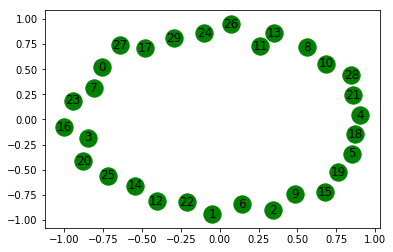

[22 13 20 ... 20 26 13]


/home/alberto/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


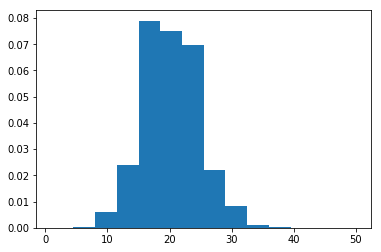

In [18]:
x = numpy.random.poisson(20, 20000000)
print(x)
count, bins, ignored = plt.hist(x, 14, normed=True)
plt.show()

[0.0709327  0.18518663 0.14354343 ... 0.0954438  0.05053816 0.03000834]


/home/alberto/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


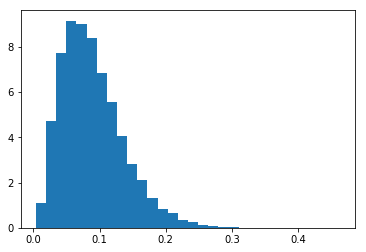

In [19]:
x = numpy.random.gamma(3.456,0.026,20000)
print(x)
count, bins, ignored = plt.hist(x, 30, normed=True)
plt.show()

[9.0, 7.0, 5.0, 6.0, 6.0, 5.0, 6.0, 4.0, 9.0, 8.0, 6.0, 6.0, 4.0, 6.0, 8.0, 8.0, 7.0, 7.0, 6.0, 7.0]


/home/alberto/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


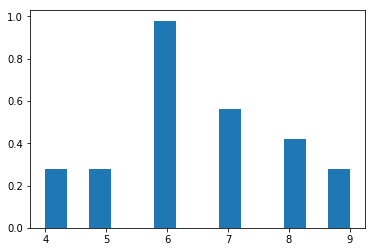

In [26]:
from soil import history

In [27]:
list(h.to_tuples())

AttributeError: module 'soil.history' has no attribute 'to_tuples'